# CareerCon2019-Help Navigate Robots

This Dataset is taken from the Kagle competition:
* **url**  ::  https://www.kaggle.com/c/career-con-2019/data

**Data Descripttion**

**X_[train/test].csv**: the input data, covering 10 sensor channels and 128 measurements 
        per time series plus three ID columns:
        
* **row_id**: The ID for this row.
* **series_id**: ID number for the measurement series. Foreign key to
             train/sample_submission.
* **measurement_number**: Measurement number within the series.

        The orientation channels encode the current angles how the robot is oriented 
        as a quaternion (see Wikipedia). Angular velocity describes the angle and speed 
        of motion, and linear acceleration components describe how the speed is 
        changing at different times. The 10 sensor channels are:

        orientation_X, orientation_Y, orientation_Z, orientation_W, angular_velocity_X,
        angular_velocity_Y, angular_velocity_Z, linear_acceleration_X,linear_acceleration_Y,
        linear_acceleration_Z



**y_train.csv**: the surfaces for training set: 
   * **series_id**: ID number for the measurement series.
   * **group_id**: ID number for all of the measurements taken in a recording session. 
        Provided for the training set only, to enable more cross validation strategies.
   * **surface**: the target for this competition.

# Exploring Our Data 

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [226]:
x_train=pd.read_csv("X_train.csv")
y_train=pd.read_csv("y_train.csv")
x_test=pd.read_csv("X_test.csv")
x_train

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.104900,-0.106000,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.104920,-0.105970,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.104950,-0.105970,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.104950,-0.105960,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.142740,3.27180,2.0115,-9.0063
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.132380,4.42750,3.0696,-8.1257
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.138940,2.70480,4.2622,-8.1443
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.130210,2.54100,4.7130,-9.4435


In [227]:
y_train

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
...,...,...,...
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled


**It can be seen that the instances in the `x_train` is 4 times the instances in the `y_train` so it clear that we need to group the instances and it will be best to group it by `series_id` by using pandas `groupby()` function.**  

Along with the grouping we'll drop the `row_id` column as it is of our no use because.

# Manipulating Our Data

* We will same operations on `x_train` and `x_test` simultaneously.

In [228]:
x_train.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z'],
      dtype='object')

In [229]:
mean_col=['orientation_X_mean',
       'orientation_Y_mean', 'orientation_Z_mean', 'orientation_W_mean', 'angular_velocity_X_mean',
       'angular_velocity_Y_mean', 'angular_velocity_Z_mean', 'linear_acceleration_X_mean',
       'linear_acceleration_Y_mean', 'linear_acceleration_Z_mean']

In [230]:
median_col=['orientation_X_median',
       'orientation_Y_median', 'orientation_Z_median', 'orientation_W_median', 'angular_velocity_X_median',
       'angular_velocity_Y_median', 'angular_velocity_Z_median', 'linear_acceleration_X_median',
       'linear_acceleration_Y_median', 'linear_acceleration_Z_median']

In [231]:
Q_col=['orientation_X_Q',
       'orientation_Y_Q', 'orientation_Z_Q', 'orientation_W_Q', 'angular_velocity_X_Q',
       'angular_velocity_Y_Q', 'angular_velocity_Z_Q', 'linear_acceleration_X_Q',
       'linear_acceleration_Y_Q', 'linear_acceleration_Z_Q']



In [232]:
std_col=['orientation_X_std',
       'orientation_Y_std', 'orientation_Z_std', 'orientation_W_std', 'angular_velocity_X_std',
       'angular_velocity_Y_std', 'angular_velocity_Z_std', 'linear_acceleration_X_std',
       'linear_acceleration_Y_std', 'linear_acceleration_Z_std']



In [233]:
def modify(x_train):
    x_train_new=x_train[["series_id","measurement_number","orientation_X","orientation_Y","orientation_Z","orientation_W","angular_velocity_X","angular_velocity_Y","angular_velocity_Z","linear_acceleration_X","linear_acceleration_Y","linear_acceleration_Z"]]
    temp1= x_train_new.groupby("series_id").mean()
    temp2= x_train_new.groupby("series_id").median()
    temp3= x_train_new.groupby("series_id").quantile()
    temp4=x_train_new.groupby("series_id").std()
    
    x_train_mean=temp1[["orientation_X","orientation_Y","orientation_Z","orientation_W","angular_velocity_X","angular_velocity_Y","angular_velocity_Z","linear_acceleration_X","linear_acceleration_Y","linear_acceleration_Z"]]
    x_train_median=temp2[["orientation_X","orientation_Y","orientation_Z","orientation_W","angular_velocity_X","angular_velocity_Y","angular_velocity_Z","linear_acceleration_X","linear_acceleration_Y","linear_acceleration_Z"]]
    x_train_quantile=temp3[["orientation_X","orientation_Y","orientation_Z","orientation_W","angular_velocity_X","angular_velocity_Y","angular_velocity_Z","linear_acceleration_X","linear_acceleration_Y","linear_acceleration_Z"]]
    x_train_std=temp4[["orientation_X","orientation_Y","orientation_Z","orientation_W","angular_velocity_X","angular_velocity_Y","angular_velocity_Z","linear_acceleration_X","linear_acceleration_Y","linear_acceleration_Z"]]
    
    x_train_mean.columns=mean_col
    x_train_median.columns=median_col
    x_train_quantile.columns=Q_col
    x_train_std.columns=std_col
    
    X=pd.concat([x_train_mean,x_train_median,x_train_quantile,x_train_std], axis=1)
    
    return X

X=modify(x_train)

print("Shape of data X with _new features:",X.shape)

Shape of data X with _new features: (3810, 40)


In [234]:
x_test=modify(x_test)

In [235]:
x_test.shape

(3816, 40)

In [236]:
X

,orientation_X_mean,orientation_Y_mean,orientation_Z_mean,orientation_W_mean,angular_velocity_X_mean,angular_velocity_Y_mean,angular_velocity_Z_mean,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,...,orientation_X_std,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_X_std,angular_velocity_Y_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,-0.634008,-0.105474,-0.106470,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391,...,0.000363,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040
1,-0.958606,0.241867,0.031650,-0.146876,0.004605,-0.007757,0.006206,0.121867,2.768193,-9.388899,...,0.000151,0.000499,0.000508,0.000521,0.092309,0.046523,0.067533,1.105945,1.864457,2.123065
2,-0.512057,-0.846171,-0.129371,-0.071082,0.002646,-0.009232,0.027989,0.149711,2.886745,-9.395783,...,0.001377,0.000785,0.000541,0.000278,0.060168,0.035530,0.021866,0.756138,1.769792,1.140267
3,-0.939169,0.310140,0.038955,-0.142319,0.000624,-0.002804,0.007887,0.201791,2.657922,-9.451164,...,0.000227,0.000453,0.000449,0.001371,0.179544,0.046700,0.032265,1.472019,4.201410,3.478530
4,-0.891301,0.428144,0.060056,-0.136460,0.006969,0.046109,-0.142385,-0.086171,2.981498,-9.349988,...,0.002955,0.006165,0.000985,0.000541,0.044773,0.016114,0.038489,0.437707,1.137776,0.812585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,-0.228787,0.961730,0.144690,-0.042361,0.002519,0.008479,-0.021297,0.266687,2.745177,-9.465299,...,0.001069,0.000260,0.000437,0.000408,0.179121,0.064410,0.055155,1.998321,1.783704,4.419187
3806,0.542262,0.826590,0.129890,0.076335,-0.000453,0.003409,-0.000416,0.136476,2.900305,-9.367247,...,0.001188,0.000775,0.000142,0.000188,0.002958,0.003101,0.002460,0.032834,0.028202,0.018792
3807,-0.416511,0.895374,0.140185,-0.070016,0.031838,0.103777,-0.338278,-0.061158,3.660786,-9.192466,...,0.014830,0.006750,0.002052,0.001534,0.236344,0.091102,0.104401,3.302411,4.599783,5.490871


In [237]:
y_train

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
...,...,...,...
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled


**We will eliminate `series_id`, `group_id` from our y_train and change its name to y**

In [238]:
y=y_train.copy()

In [239]:
y

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
...,...,...,...
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled


In [240]:
y.drop(columns=['series_id','group_id'],axis=1,inplace=True)
y

,surface
0,fine_concrete
1,concrete
2,concrete
3,concrete
4,soft_tiles
...,...
3805,tiled
3806,wood
3807,fine_concrete
3808,tiled


In [241]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3810 entries, 0 to 3809
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   orientation_X_mean            3810 non-null   float64
 1   orientation_Y_mean            3810 non-null   float64
 2   orientation_Z_mean            3810 non-null   float64
 3   orientation_W_mean            3810 non-null   float64
 4   angular_velocity_X_mean       3810 non-null   float64
 5   angular_velocity_Y_mean       3810 non-null   float64
 6   angular_velocity_Z_mean       3810 non-null   float64
 7   linear_acceleration_X_mean    3810 non-null   float64
 8   linear_acceleration_Y_mean    3810 non-null   float64
 9   linear_acceleration_Z_mean    3810 non-null   float64
 10  orientation_X_median          3810 non-null   float64
 11  orientation_Y_median          3810 non-null   float64
 12  orientation_Z_median          3810 non-null   float64
 13  ori

All columns of X are in numerical values

In [242]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surface  3810 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


We need to encode our `Y`

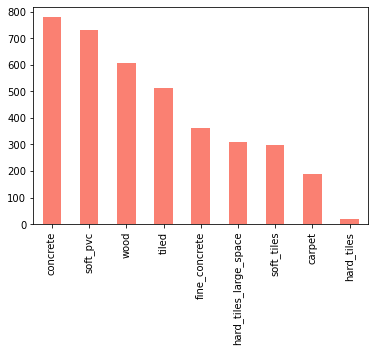

In [243]:
y.surface.value_counts().plot(kind='bar',color='salmon');

**We will Label Encode our `y`**

In [244]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['surface'],return_df=True,
                           mapping=[{'col':'surface',
'mapping':{'hard_tiles':0,'carpet':1,'soft_tiles':2,'hard_tiles_large_space':3,
           'fine_concrete':4,'tiled':5,'wood':6, 'soft_pvc':7, 'concrete':8}}])

y=encoder.fit_transform(y)
y

,surface
0,4
1,8
2,8
3,8
4,2
...,...
3805,5
3806,6
3807,4
3808,5


# Exploring and Manipulating Our New Data 

* We will combine our X and y and explore the data as a whole

In [23]:
data=pd.concat([X,y],axis=1)
data

,orientation_X_mean,orientation_Y_mean,orientation_Z_mean,orientation_W_mean,angular_velocity_X_mean,angular_velocity_Y_mean,angular_velocity_Z_mean,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,...,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_X_std,angular_velocity_Y_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std,surface
0,-0.758666,-0.634008,-0.105474,-0.106470,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391,...,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040,4
1,-0.958606,0.241867,0.031650,-0.146876,0.004605,-0.007757,0.006206,0.121867,2.768193,-9.388899,...,0.000499,0.000508,0.000521,0.092309,0.046523,0.067533,1.105945,1.864457,2.123065,8
2,-0.512057,-0.846171,-0.129371,-0.071082,0.002646,-0.009232,0.027989,0.149711,2.886745,-9.395783,...,0.000785,0.000541,0.000278,0.060168,0.035530,0.021866,0.756138,1.769792,1.140267,8
3,-0.939169,0.310140,0.038955,-0.142319,0.000624,-0.002804,0.007887,0.201791,2.657922,-9.451164,...,0.000453,0.000449,0.001371,0.179544,0.046700,0.032265,1.472019,4.201410,3.478530,8
4,-0.891301,0.428144,0.060056,-0.136460,0.006969,0.046109,-0.142385,-0.086171,2.981498,-9.349988,...,0.006165,0.000985,0.000541,0.044773,0.016114,0.038489,0.437707,1.137776,0.812585,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,-0.228787,0.961730,0.144690,-0.042361,0.002519,0.008479,-0.021297,0.266687,2.745177,-9.465299,...,0.000260,0.000437,0.000408,0.179121,0.064410,0.055155,1.998321,1.783704,4.419187,5
3806,0.542262,0.826590,0.129890,0.076335,-0.000453,0.003409,-0.000416,0.136476,2.900305,-9.367247,...,0.000775,0.000142,0.000188,0.002958,0.003101,0.002460,0.032834,0.028202,0.018792,6
3807,-0.416511,0.895374,0.140185,-0.070016,0.031838,0.103777,-0.338278,-0.061158,3.660786,-9.192466,...,0.006750,0.002052,0.001534,0.236344,0.091102,0.104401,3.302411,4.599783,5.490871,4
3808,-0.264584,0.952734,0.142060,-0.045705,0.001128,-0.029315,0.088592,0.218964,3.075475,-9.345442,...,0.001188,0.001356,0.000691,0.168517,0.063420,0.078904,2.580755,3.897474,3.156739,5


## Correlation Matrix

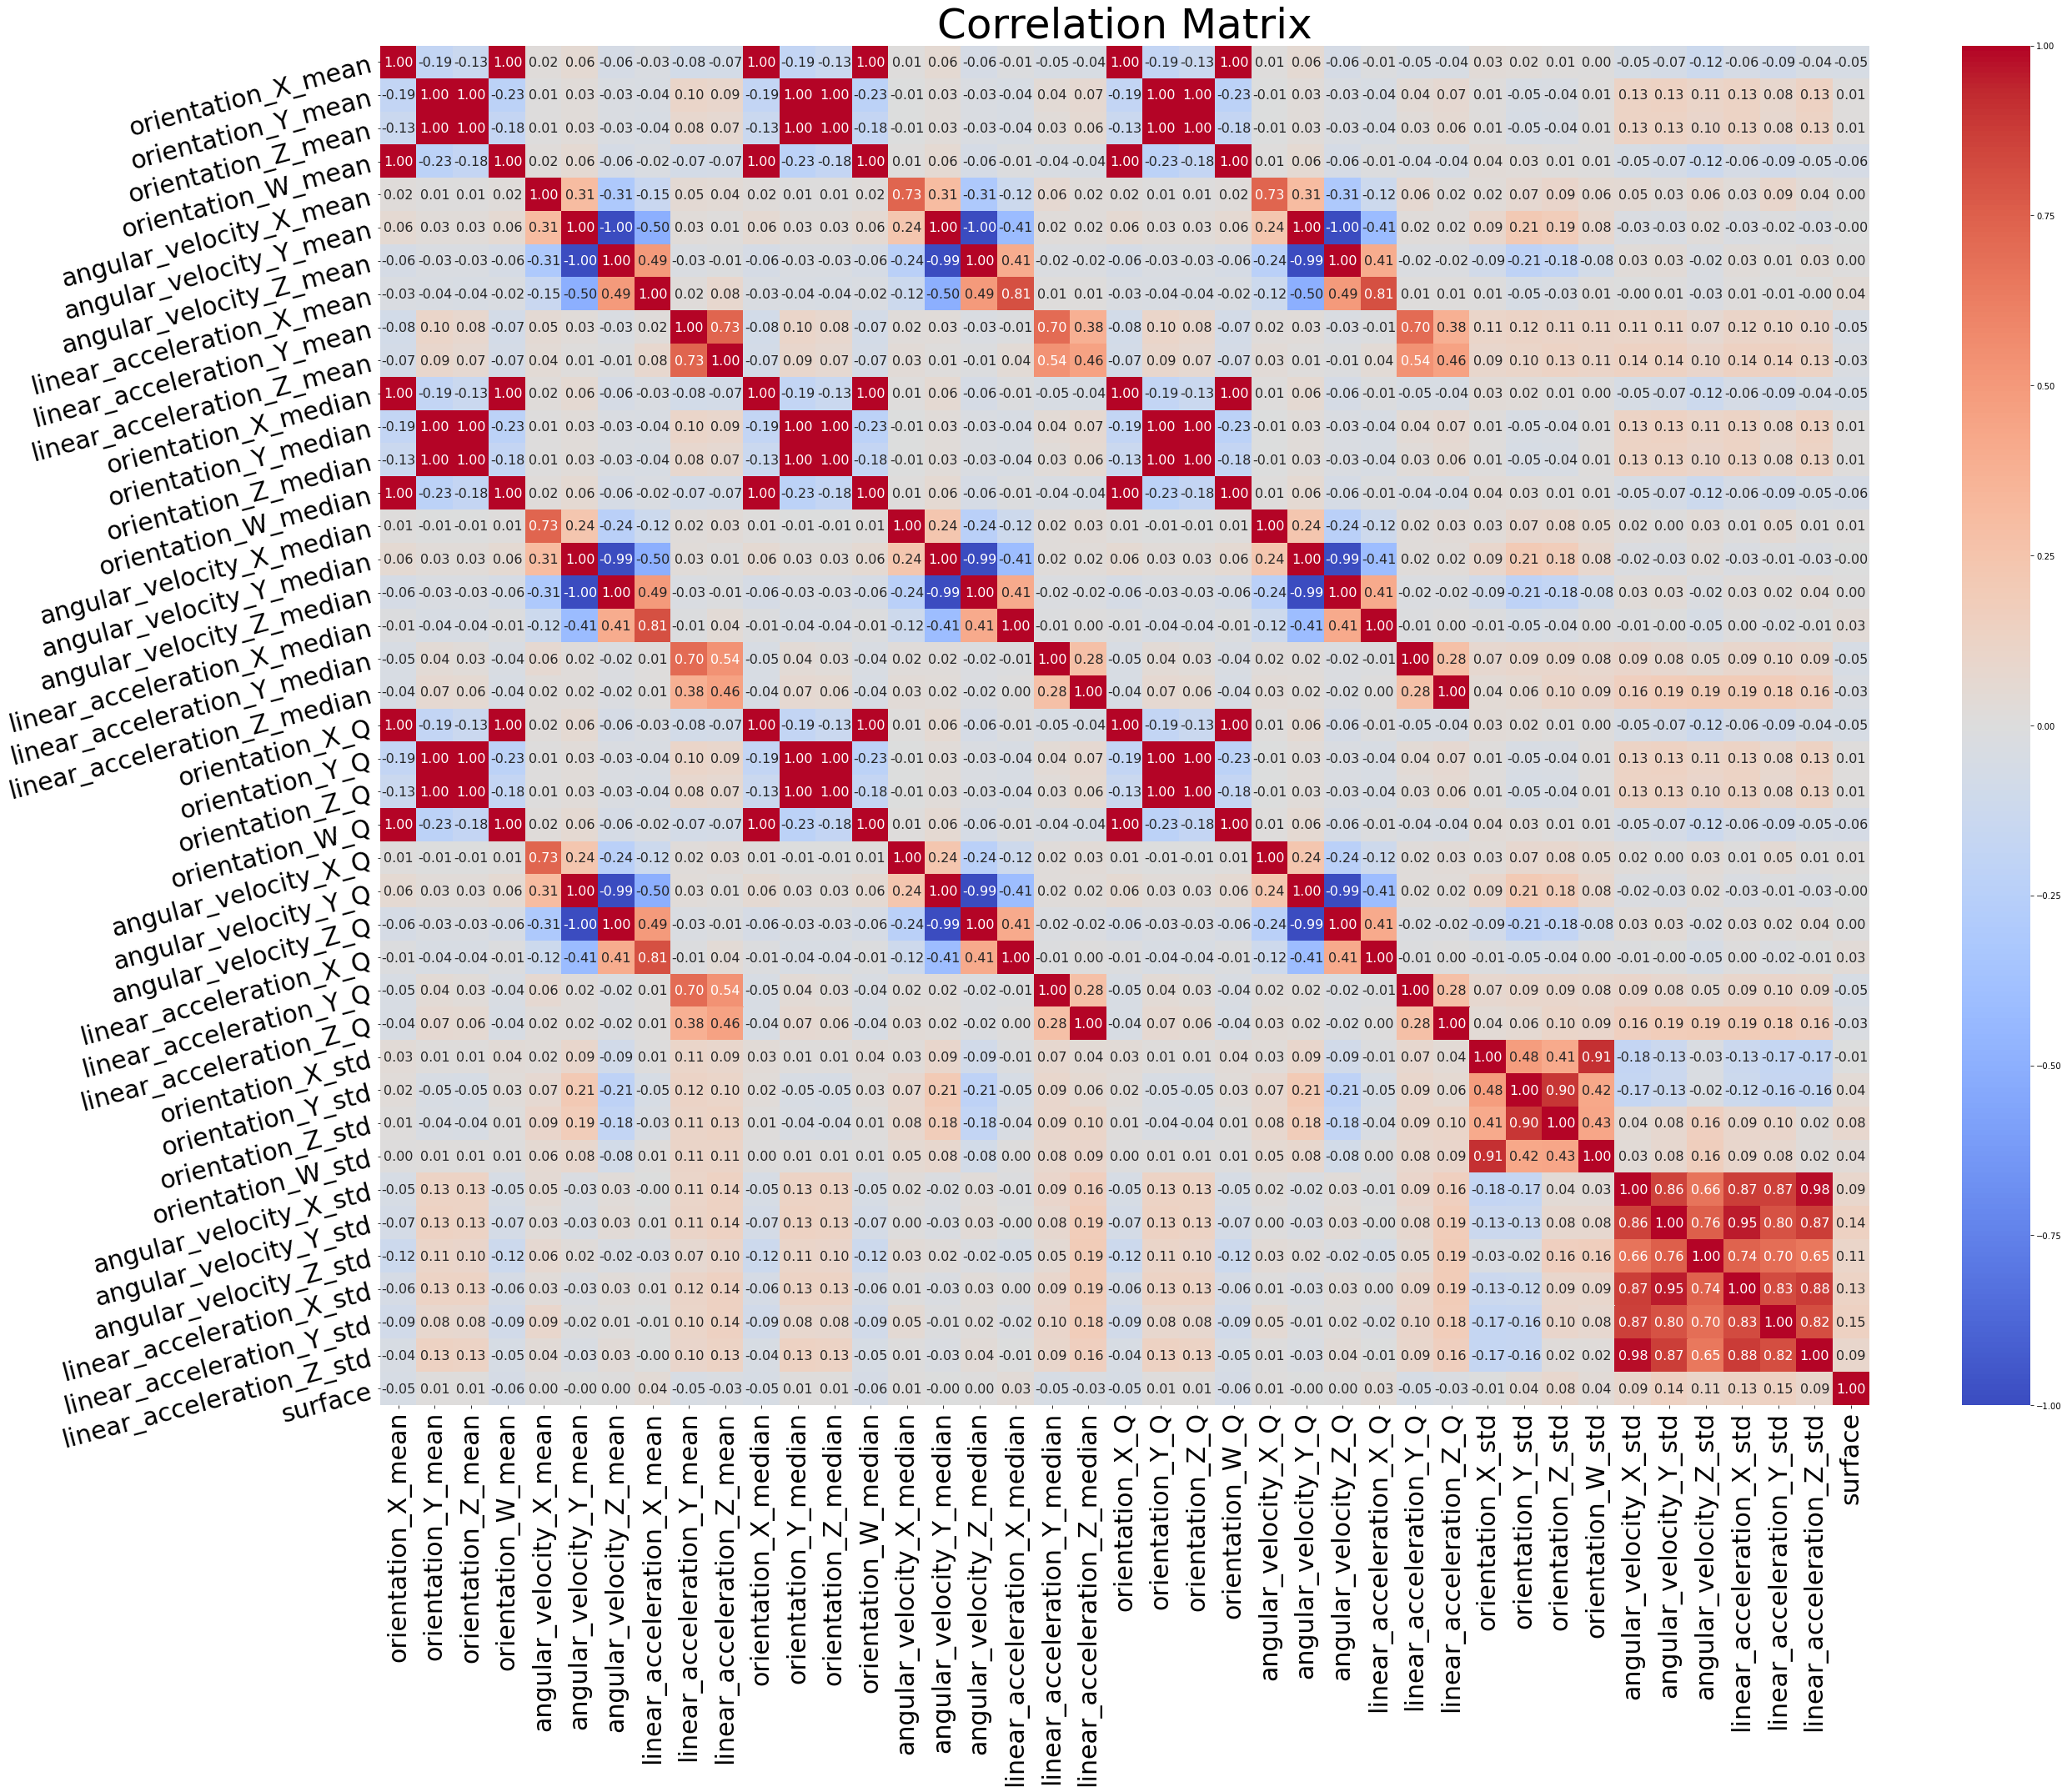

In [24]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(40,30))
# plt.rcParams['figure.figsize']=(,50)
corr=data.corr()
sns.heatmap(corr,
              cmap='coolwarm',
              annot=True,
              fmt='.2f',
              ax=ax,
              annot_kws={'size':16},
           vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix",
         fontsize=50)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=15, fontsize=30)
plt.show()

**Visual Correlation Matrix is not of Much Use in this Case. So we will use Pandas DataFrame to visualise it clearly.**

In [25]:
corr_mat=pd.DataFrame(corr)

In [26]:
corr_mat


,orientation_X_mean,orientation_Y_mean,orientation_Z_mean,orientation_W_mean,angular_velocity_X_mean,angular_velocity_Y_mean,angular_velocity_Z_mean,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,...,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_X_std,angular_velocity_Y_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std,surface
orientation_X_mean,1.000000,-0.185739,-0.134193,0.998389,0.016822,0.061138,-0.061256,-0.025172,-0.082779,-0.074087,...,0.024387,0.009226,0.004957,-0.049846,-0.067461,-0.120069,-0.058445,-0.090841,-0.044888,-0.053210
orientation_Y_mean,-0.185739,1.000000,0.997548,-0.226188,0.006526,0.027510,-0.026928,-0.038835,0.103638,0.087836,...,-0.046323,-0.038261,0.014907,0.130008,0.134701,0.105930,0.130515,0.079567,0.133794,0.009647
orientation_Z_mean,-0.134193,0.997548,1.000000,-0.176385,0.006861,0.030189,-0.029567,-0.039385,0.081402,0.069719,...,-0.051055,-0.042101,0.012779,0.126863,0.130243,0.101375,0.126493,0.075176,0.130544,0.013156
orientation_W_mean,0.998389,-0.226188,-0.176385,1.000000,0.017131,0.060613,-0.060842,-0.024655,-0.072024,-0.065791,...,0.028554,0.011572,0.005888,-0.053308,-0.070174,-0.124563,-0.061520,-0.093308,-0.047967,-0.059837
angular_velocity_X_mean,0.016822,0.006526,0.006861,0.017131,1.000000,0.309207,-0.307368,-0.148107,0.054043,0.043506,...,0.065073,0.094047,0.055789,0.050146,0.027001,0.064326,0.025432,0.088130,0.035321,0.002756
angular_velocity_Y_mean,0.061138,0.027510,0.030189,0.060613,0.309207,1.000000,-0.995359,-0.503055,0.028854,0.010907,...,0.211654,0.186336,0.083214,-0.025961,-0.032389,0.022488,-0.027649,-0.015034,-0.034231,-0.002335
angular_velocity_Z_mean,-0.061256,-0.026928,-0.029567,-0.060842,-0.307368,-0.995359,1.000000,0.494930,-0.029994,-0.013900,...,-0.211759,-0.183823,-0.084746,0.026215,0.031774,-0.023981,0.027383,0.014552,0.034834,0.002461
linear_acceleration_X_mean,-0.025172,-0.038835,-0.039385,-0.024655,-0.148107,-0.503055,0.494930,1.000000,0.016365,0.082825,...,-0.047409,-0.034125,0.009210,-0.001683,0.006249,-0.025733,0.008193,-0.005155,-0.001553,0.044426
linear_acceleration_Y_mean,-0.082779,0.103638,0.081402,-0.072024,0.054043,0.028854,-0.029994,0.016365,1.000000,0.726575,...,0.122039,0.113253,0.109968,0.106711,0.113995,0.067962,0.116685,0.102318,0.098433,-0.045590
linear_acceleration_Z_mean,-0.074087,0.087836,0.069719,-0.065791,0.043506,0.010907,-0.013900,0.082825,0.726575,1.000000,...,0.101717,0.125218,0.114787,0.140556,0.139345,0.096145,0.141534,0.140916,0.129112,-0.029811


In [27]:
len(corr_mat.surface.values)

41

In [28]:
corr_mat.surface.value_counts().values.sum()

41

In [29]:
corr_mat.columns[0]

'orientation_X_mean'

In [30]:
corr_mat.surface.iloc[0]

-0.053209925191376205

In [31]:
list_cols=[]
for i in range(0,40,1):
    if(abs(corr_mat.surface.iloc[i])<=0.005):
        list_cols.append(corr_mat.columns[i])
    else:
        pass
        

In [32]:
list_cols,len(list_cols)

(['angular_velocity_X_mean',
  'angular_velocity_Y_mean',
  'angular_velocity_Z_mean',
  'angular_velocity_Y_median',
  'angular_velocity_Z_median',
  'angular_velocity_Y_Q',
  'angular_velocity_Z_Q'],
 7)

**We need to drop `list_cols` columns from the main data as they are not contributing to the target Label**

In [33]:
corr_mat.drop(columns=list_cols,axis=1,inplace=True)


In [34]:
data.drop(columns=list_cols,axis=1,inplace=True)
# X.drop(columns=list_cols,axis=1,inplace=True)

In [35]:
data

,orientation_X_mean,orientation_Y_mean,orientation_Z_mean,orientation_W_mean,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_X_median,orientation_Y_median,orientation_Z_median,...,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_X_std,angular_velocity_Y_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std,surface
0,-0.758666,-0.634008,-0.105474,-0.106470,0.263418,2.984195,-9.320391,-0.758530,-0.634270,-0.105500,...,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040,4
1,-0.958606,0.241867,0.031650,-0.146876,0.121867,2.768193,-9.388899,-0.958595,0.241890,0.031688,...,0.000499,0.000508,0.000521,0.092309,0.046523,0.067533,1.105945,1.864457,2.123065,8
2,-0.512057,-0.846171,-0.129371,-0.071082,0.149711,2.886745,-9.395783,-0.512035,-0.846210,-0.129405,...,0.000785,0.000541,0.000278,0.060168,0.035530,0.021866,0.756138,1.769792,1.140267,8
3,-0.939169,0.310140,0.038955,-0.142319,0.201791,2.657922,-9.451164,-0.939170,0.310115,0.038889,...,0.000453,0.000449,0.001371,0.179544,0.046700,0.032265,1.472019,4.201410,3.478530,8
4,-0.891301,0.428144,0.060056,-0.136460,-0.086171,2.981498,-9.349988,-0.890940,0.428865,0.060113,...,0.006165,0.000985,0.000541,0.044773,0.016114,0.038489,0.437707,1.137776,0.812585,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,-0.228787,0.961730,0.144690,-0.042361,0.266687,2.745177,-9.465299,-0.229275,0.961650,0.144740,...,0.000260,0.000437,0.000408,0.179121,0.064410,0.055155,1.998321,1.783704,4.419187,5
3806,0.542262,0.826590,0.129890,0.076335,0.136476,2.900305,-9.367247,0.542260,0.826590,0.129900,...,0.000775,0.000142,0.000188,0.002958,0.003101,0.002460,0.032834,0.028202,0.018792,6
3807,-0.416511,0.895374,0.140185,-0.070016,-0.061158,3.660786,-9.192466,-0.416225,0.895975,0.139735,...,0.006750,0.002052,0.001534,0.236344,0.091102,0.104401,3.302411,4.599783,5.490871,4
3808,-0.264584,0.952734,0.142060,-0.045705,0.218964,3.075475,-9.345442,-0.265320,0.952310,0.141975,...,0.001188,0.001356,0.000691,0.168517,0.063420,0.078904,2.580755,3.897474,3.156739,5


In [36]:
X.drop(columns=list_cols,axis=1,inplace=True)

In [38]:
x_test.drop(columns=list_cols,axis=1,inplace=True)

Let's Create a function to select highly correlated features

In [47]:
np.random.seed(42)
col_corr=set()
row_corr=set()
def correlation(dataset,threshold):
    for i in range(len(pd.DataFrame(X.corr()).columns)):
        for j in range(i):
            if (abs(pd.DataFrame(X.corr()).iloc[i,j])>threshold):
                colname=pd.DataFrame(X.corr()).columns[i]
                rowname=pd.DataFrame(X.corr()).index[j]
                col_corr.add(colname)
                row_corr.add(rowname)
    return pd.DataFrame(col_corr,row_corr,columns=["Highly Correlated With"])

In [48]:
pd.DataFrame(X.corr()).columns[1]

'orientation_Y_mean'

In [49]:
pd.DataFrame(X.corr()).index[2]

'orientation_Z_mean'

In [50]:
np.random.seed(42)
correlation(X,0.90)

,Highly Correlated With
orientation_W_mean,orientation_W_mean
angular_velocity_Y_std,linear_acceleration_Y_Q
orientation_Y_median,orientation_Y_median
orientation_X_median,linear_acceleration_Z_Q
angular_velocity_X_std,linear_acceleration_X_std
orientation_Z_median,orientation_X_median
orientation_X_Q,orientation_Z_median
orientation_X_mean,orientation_X_Q
angular_velocity_X_median,angular_velocity_X_Q
linear_acceleration_Y_median,orientation_W_Q


In [53]:
row_corr,len(row_corr)

({'angular_velocity_X_median',
  'angular_velocity_X_std',
  'angular_velocity_Y_std',
  'linear_acceleration_X_median',
  'linear_acceleration_Y_median',
  'linear_acceleration_Z_median',
  'orientation_W_mean',
  'orientation_W_median',
  'orientation_X_Q',
  'orientation_X_mean',
  'orientation_X_median',
  'orientation_X_std',
  'orientation_Y_Q',
  'orientation_Y_mean',
  'orientation_Y_median',
  'orientation_Z_mean',
  'orientation_Z_median'},
 17)

In [58]:
r_featurs=['angular_velocity_X_median',
  'angular_velocity_X_std',
  'angular_velocity_Y_std',
  'linear_acceleration_X_median',
  'linear_acceleration_Y_median',
  'linear_acceleration_Z_median',
  'orientation_W_mean',
  'orientation_W_median',
  'orientation_X_Q',
  'orientation_X_mean',
  'orientation_X_median',
  'orientation_X_std',
  'orientation_Y_Q',
  'orientation_Y_mean',
  'orientation_Y_median',
  'orientation_Z_mean',
  'orientation_Z_median'] # Features to be removed

In [59]:
len(r_featurs)

17

In [60]:
X.drop(columns=r_featurs,axis=1,inplace=True)
x_test.drop(columns=r_featurs,axis=1,inplace=True)

In [61]:
data.drop(columns=r_featurs,axis=1,inplace=True)

In [62]:
X

,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_Z_Q,orientation_W_Q,angular_velocity_X_Q,linear_acceleration_X_Q,linear_acceleration_Y_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,,,,,,,
0,0.263418,2.984195,-9.320391,-0.105500,-0.106555,-0.005082,0.231665,3.40755,-9.42995,0.000471,0.000432,0.000389,0.017127,0.911175,1.387790,1.095040
1,0.121867,2.768193,-9.388899,0.031688,-0.146910,0.010344,0.003571,2.75010,-9.41380,0.000499,0.000508,0.000521,0.067533,1.105945,1.864457,2.123065
2,0.149711,2.886745,-9.395783,-0.129405,-0.071139,-0.003120,0.174515,3.03375,-9.37440,0.000785,0.000541,0.000278,0.021866,0.756138,1.769792,1.140267
3,0.201791,2.657922,-9.451164,0.038889,-0.142510,0.006709,0.317205,3.00885,-9.16170,0.000453,0.000449,0.001371,0.032265,1.472019,4.201410,3.478530
4,-0.086171,2.981498,-9.349988,0.060113,-0.136560,0.010157,-0.054043,3.13565,-9.33280,0.006165,0.000985,0.000541,0.038489,0.437707,1.137776,0.812585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,0.266687,2.745177,-9.465299,0.144740,-0.042384,-0.005029,0.390665,2.58605,-9.65750,0.000260,0.000437,0.000408,0.055155,1.998321,1.783704,4.419187
3806,0.136476,2.900305,-9.367247,0.129900,0.076329,-0.000334,0.136950,2.90145,-9.36740,0.000775,0.000142,0.000188,0.002460,0.032834,0.028202,0.018792
3807,-0.061158,3.660786,-9.192466,0.139735,-0.070142,0.038776,0.165465,3.65475,-9.53715,0.006750,0.002052,0.001534,0.104401,3.302411,4.599783,5.490871


In [63]:
x_test.shape

(3816, 16)

## Skewed Data

In [64]:
X.columns

Index(['linear_acceleration_X_mean', 'linear_acceleration_Y_mean',
       'linear_acceleration_Z_mean', 'orientation_Z_Q', 'orientation_W_Q',
       'angular_velocity_X_Q', 'linear_acceleration_X_Q',
       'linear_acceleration_Y_Q', 'linear_acceleration_Z_Q',
       'orientation_Y_std', 'orientation_Z_std', 'orientation_W_std',
       'angular_velocity_Z_std', 'linear_acceleration_X_std',
       'linear_acceleration_Y_std', 'linear_acceleration_Z_std'],
      dtype='object')

In [65]:
X.skew()

linear_acceleration_X_mean   -0.224202
linear_acceleration_Y_mean   -1.004033
linear_acceleration_Z_mean   -0.540144
orientation_Z_Q              -0.175329
orientation_W_Q               0.039445
angular_velocity_X_Q          0.587356
linear_acceleration_X_Q      -0.078912
linear_acceleration_Y_Q      -0.173528
linear_acceleration_Z_Q       0.847414
orientation_Y_std             2.922839
orientation_Z_std             2.678828
orientation_W_std             2.633047
angular_velocity_Z_std        3.852691
linear_acceleration_X_std     1.971716
linear_acceleration_Y_std     3.408669
linear_acceleration_Z_std     1.932036
dtype: float64

In [66]:
import numpy as np
np.random.seed(42)
highly_skewed=[]
for i in range(len(X.columns)):
    skewness_value=X.skew()
    if ((skewness_value[i]<=-0.5) or (skewness_value[i]>=0.5)):
        highly_skewed.append(X.columns[i])
    print(f"The Skewness of {X.columns[i]} is :: {X.skew()[i]:.2f}")

The Skewness of linear_acceleration_X_mean is :: -0.22
The Skewness of linear_acceleration_Y_mean is :: -1.00
The Skewness of linear_acceleration_Z_mean is :: -0.54
The Skewness of orientation_Z_Q is :: -0.18
The Skewness of orientation_W_Q is :: 0.04
The Skewness of angular_velocity_X_Q is :: 0.59
The Skewness of linear_acceleration_X_Q is :: -0.08
The Skewness of linear_acceleration_Y_Q is :: -0.17
The Skewness of linear_acceleration_Z_Q is :: 0.85
The Skewness of orientation_Y_std is :: 2.92
The Skewness of orientation_Z_std is :: 2.68
The Skewness of orientation_W_std is :: 2.63
The Skewness of angular_velocity_Z_std is :: 3.85
The Skewness of linear_acceleration_X_std is :: 1.97
The Skewness of linear_acceleration_Y_std is :: 3.41
The Skewness of linear_acceleration_Z_std is :: 1.93


**Skewness Rule**:
    * If skewness is less than -1 or greater than 1, the distribution is highly skewed.
    * If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
    * If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [67]:
highly_skewed

['linear_acceleration_Y_mean',
 'linear_acceleration_Z_mean',
 'angular_velocity_X_Q',
 'linear_acceleration_Z_Q',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

Lets make a copy of our Data, so we can retore it easily if we mishandel it

In [68]:
x=X.copy()

In [ ]:
col_pos_sk=['linear_acceleration_Z_median',
 'orientation_X_std',
 'orientation_Y_std',
 'orientation_Z_std',
 'angular_velocity_X_std',
 'angular_velocity_Y_std',
 'angular_velocity_Z_std',
 'linear_acceleration_Y_std']  # Columns with positive skewness

# **Right Now We are Proceeding with the Skewed Data**

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,
                                             test_size=0.15,
                                             random_state=0)


In [70]:
x_train

,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_Z_Q,orientation_W_Q,angular_velocity_X_Q,linear_acceleration_X_Q,linear_acceleration_Y_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,,,,,,,
3013,-0.004328,3.003214,-9.290207,0.073037,-0.130320,0.004379,-0.042120,3.03035,-9.37580,0.000467,0.000479,0.000429,0.039502,0.942788,1.587223,1.976677
2970,0.569953,2.563827,-9.432370,0.071085,0.133900,-0.012030,0.661000,2.34220,-10.11100,0.000332,0.000468,0.000775,0.062038,3.248439,2.522379,5.511663
3721,0.166062,2.800646,-9.278191,0.136070,-0.062262,-0.003272,0.188935,2.47730,-9.31370,0.000942,0.000769,0.000635,0.029096,0.648117,2.038383,1.333664
1015,0.084503,2.953598,-9.342222,-0.035729,0.145885,0.000466,0.063390,3.00430,-9.35860,0.001669,0.000336,0.000129,0.008846,0.301146,0.481461,0.376388
458,0.108824,3.039039,-9.343827,-0.135260,0.061907,0.002220,0.127120,2.98840,-9.33365,0.000497,0.000230,0.000141,0.014840,0.260232,0.443245,0.265895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,0.112100,2.195386,-9.453693,-0.081910,0.084555,-0.025140,0.349415,2.26800,-9.39415,0.004227,0.001384,0.000760,0.088307,2.219152,1.025470,1.321201
2066,0.160580,2.834010,-9.398328,0.129955,-0.083388,0.001015,0.257980,2.85375,-9.34570,0.000434,0.000302,0.000435,0.018165,0.614836,0.607745,0.702427
2883,-0.035322,3.162095,-9.342345,0.075852,-0.134020,-0.010055,-0.369405,3.53855,-9.26380,0.006886,0.000826,0.001373,0.233780,2.358341,3.119164,2.694261


In [71]:
x_val

,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_Z_Q,orientation_W_Q,angular_velocity_X_Q,linear_acceleration_X_Q,linear_acceleration_Y_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,,,,,,,
1629,0.662350,4.040469,-8.960618,0.149130,0.040764,0.030820,0.113212,3.35270,-9.37295,0.000465,0.003046,0.002117,0.313503,9.145643,6.815429,8.120562
3086,0.188758,2.743945,-9.402145,-0.119155,-0.091702,-0.005189,0.309790,2.62215,-9.38125,0.005232,0.000704,0.001133,0.018326,0.777779,1.138007,0.769880
2303,0.077894,2.849840,-9.384472,0.139025,-0.045738,0.023227,0.148960,2.62970,-9.12980,0.000168,0.001525,0.000277,0.034944,1.225135,1.942592,2.347808
3011,-0.017269,2.917991,-9.348732,-0.129940,-0.073744,0.010974,0.190660,3.06190,-9.43560,0.007726,0.001429,0.001618,0.070716,1.905716,2.414599,2.047414
1268,-0.083483,2.965152,-9.361273,0.052283,0.139180,0.004757,-0.097322,2.99045,-9.40905,0.001903,0.000184,0.000306,0.040926,0.246526,0.405835,0.457203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0.219799,2.682700,-9.351143,0.061191,-0.134570,-0.003565,0.227215,2.54740,-9.37965,0.000648,0.000446,0.000531,0.042089,0.764238,1.806823,1.990702
2060,0.201498,2.536306,-9.399267,0.068655,-0.130490,-0.001873,0.209030,2.15750,-9.59390,0.000567,0.000655,0.000639,0.030833,0.880462,1.847202,1.594633
736,0.141807,2.751705,-9.368402,0.033236,-0.146415,-0.001796,-0.162080,2.79625,-9.50885,0.004033,0.000548,0.000698,0.103280,3.063614,2.735854,3.577368


In [72]:
y_train.values

array([[4],
       [3],
       [7],
       ...,
       [8],
       [4],
       [7]])

# Training and Testing of the Models

In [84]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(splitter='random',max_depth=30,
                                      random_state = 62), 
               RandomForestClassifier(n_estimators = 100,
                                      criterion='entropy',
                                      random_state = 92,
                                      class_weight='balanced',
                                      max_depth=30), 
               GradientBoostingClassifier(random_state = 92),
              XGBClassifier(max_depth=30, objective='multi:softprob', n_estimators=100, 
                        num_classes=9,
                           verbosity=0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier",
                    "XGBClassifier"]
accuracies = []

In [86]:

for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_val, y_pred,average='weighted')))
    accuracy = accuracy_score(y_val, y_pred)*100
    accuracies.append(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gaussian Naive Bayes:
F1 score: 0.42
Support Vector Classifier:
F1 score: 0.23
Decision Tree Classifier:
F1 score: 0.72


<ipython-input-86-9f6f5f1a07b9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


Random Forest Classifier:
F1 score: 0.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gradient Boosting Classifier:
F1 score: 0.79


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier:
F1 score: 0.87


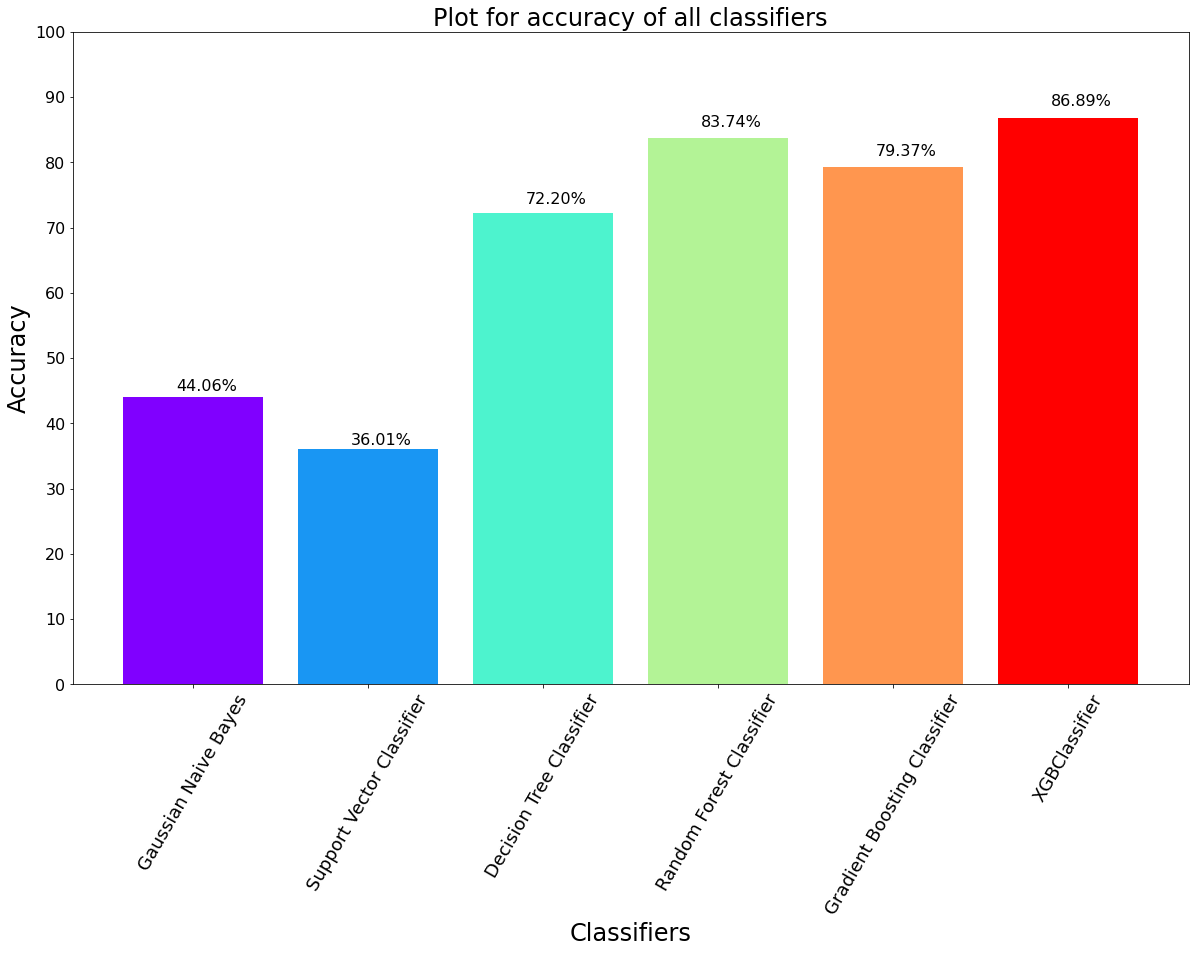

In [87]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 18,rotation=60)
plt.xlabel("Classifiers", fontsize = 24)

plt.ylabel("Accuracy", fontsize = 24)
plt.title("Plot for accuracy of all classifiers", fontsize = 24)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

**Best Score with Skewed Data is 86.89%**

# Now We Will Treat The Skewness of the Data

In [88]:
x_new=X.copy()

In [89]:
y_new=y.copy()

In [90]:
highly_skewed,len(highly_skewed)

(['linear_acceleration_Y_mean',
  'linear_acceleration_Z_mean',
  'angular_velocity_X_Q',
  'linear_acceleration_Z_Q',
  'orientation_Y_std',
  'orientation_Z_std',
  'orientation_W_std',
  'angular_velocity_Z_std',
  'linear_acceleration_X_std',
  'linear_acceleration_Y_std',
  'linear_acceleration_Z_std'],
 11)

In [91]:
for i in range(len(highly_skewed)):
    skewness_value=x_new[highly_skewed[i]].skew()
    print(f"The Skewness of {highly_skewed[i]} is :: {skewness_value}")

The Skewness of linear_acceleration_Y_mean is :: -1.0040332736700273
The Skewness of linear_acceleration_Z_mean is :: -0.5401443423760927
The Skewness of angular_velocity_X_Q is :: 0.58735596996692
The Skewness of linear_acceleration_Z_Q is :: 0.8474141964589363
The Skewness of orientation_Y_std is :: 2.922839462158444
The Skewness of orientation_Z_std is :: 2.678827976919967
The Skewness of orientation_W_std is :: 2.6330471217820417
The Skewness of angular_velocity_Z_std is :: 3.8526909074876277
The Skewness of linear_acceleration_X_std is :: 1.9717155123521488
The Skewness of linear_acceleration_Y_std is :: 3.408668871125469
The Skewness of linear_acceleration_Z_std is :: 1.9320355933820321


In [92]:
from matplotlib import rcParams

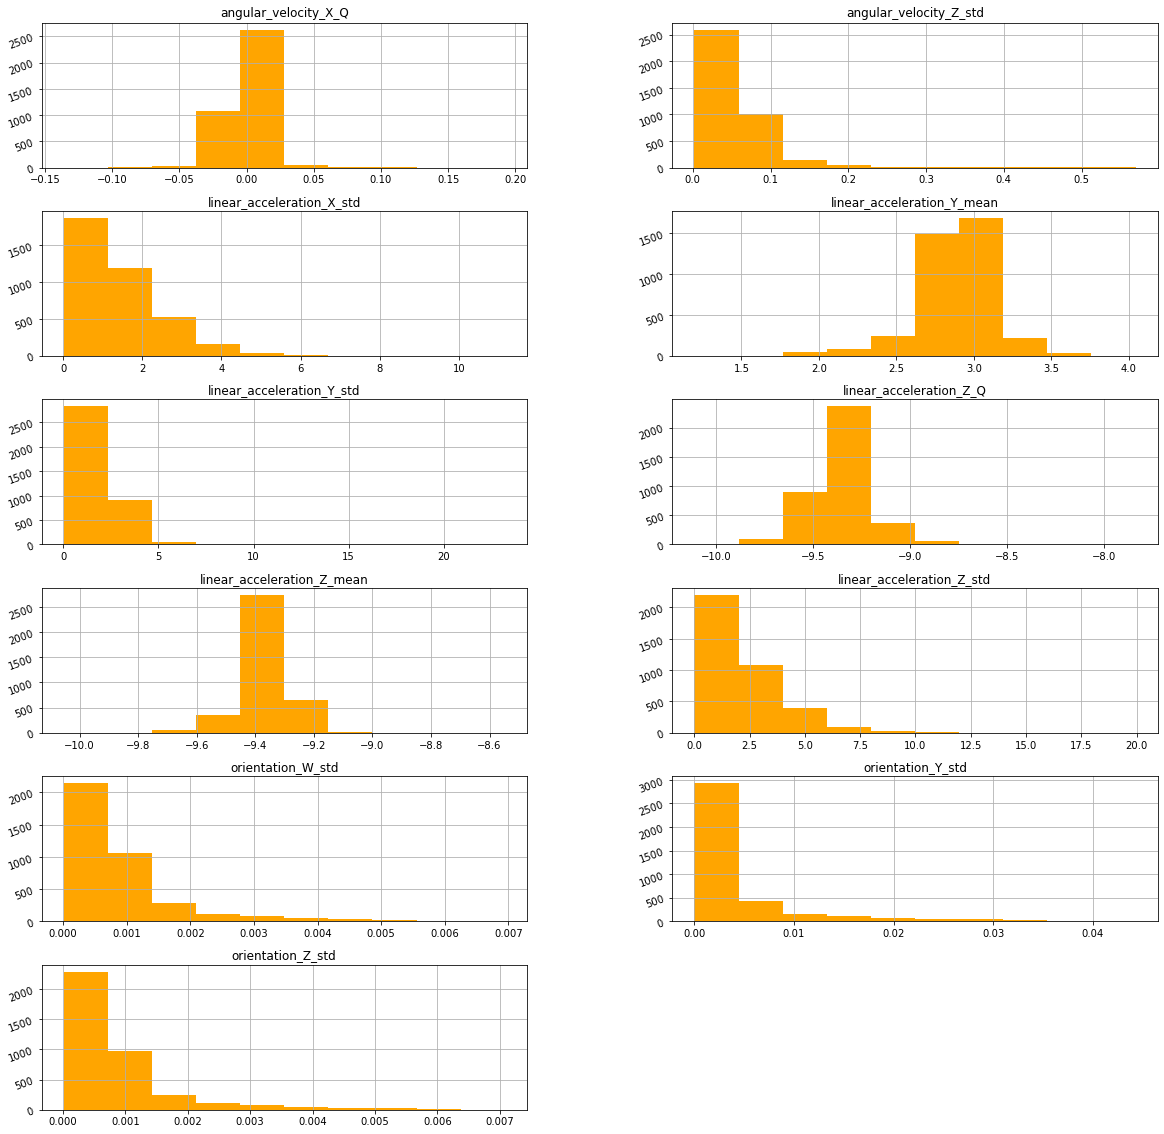

In [93]:
rcParams['figure.figsize'] = 30, 12
x_new[highly_skewed].hist(figsize=(20,20),
                                                                                 yrot=20,
                                                                                 color="orange",
                                                                                 layout=(6,2));

**The Following Columns have negative Values so We cannot apply `Log Transformation`
    and `sqrt transformation` to them because that will return NAN value**:
        * 'linear_acceleration_Z_mean',
        * 'angular_velocity_X_Q',
        * 'linear_acceleration_Z_Q'. 

In [94]:
highly_skewed

['linear_acceleration_Y_mean',
 'linear_acceleration_Z_mean',
 'angular_velocity_X_Q',
 'linear_acceleration_Z_Q',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

In [96]:
data.corr()


,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_Z_Q,orientation_W_Q,angular_velocity_X_Q,linear_acceleration_X_Q,linear_acceleration_Y_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std,surface
linear_acceleration_X_mean,1.000000,0.016365,0.082825,-0.039340,-0.024655,-0.119909,0.807290,0.010300,0.012873,-0.047409,-0.034125,0.009210,-0.025733,0.008193,-0.005155,-0.001553,0.044426
linear_acceleration_Y_mean,0.016365,1.000000,0.726575,0.081350,-0.071933,0.021346,-0.010184,0.704977,0.377516,0.122039,0.113253,0.109968,0.067962,0.116685,0.102318,0.098433,-0.045590
linear_acceleration_Z_mean,0.082825,0.726575,1.000000,0.069735,-0.065708,0.032185,0.042780,0.535651,0.456411,0.101717,0.125218,0.114787,0.096145,0.141534,0.140916,0.129112,-0.029811
orientation_Z_Q,-0.039340,0.081350,0.069735,1.000000,-0.176372,-0.005908,-0.043092,0.027519,0.055715,-0.051054,-0.042151,0.012776,0.101369,0.126410,0.075139,0.130493,0.013065
orientation_W_Q,-0.024655,-0.071933,-0.065708,-0.176372,1.000000,0.013564,-0.012791,-0.037643,-0.040548,0.028570,0.011634,0.005970,-0.124549,-0.061463,-0.093219,-0.047916,-0.059775
angular_velocity_X_Q,-0.119909,0.021346,0.032185,-0.005908,0.013564,1.000000,-0.115416,0.022114,0.032727,0.072293,0.080734,0.054695,0.032913,0.005291,0.048719,0.005895,0.012191
linear_acceleration_X_Q,0.807290,-0.010184,0.042780,-0.043092,-0.012791,-0.115416,1.000000,-0.008479,0.004732,-0.047613,-0.035369,0.002234,-0.049809,0.002114,-0.016293,-0.006898,0.032763
linear_acceleration_Y_Q,0.010300,0.704977,0.535651,0.027519,-0.037643,0.022114,-0.008479,1.000000,0.277847,0.089090,0.092168,0.079641,0.048482,0.087956,0.100119,0.087903,-0.051472
linear_acceleration_Z_Q,0.012873,0.377516,0.456411,0.055715,-0.040548,0.032727,0.004732,0.277847,1.000000,0.059801,0.104565,0.094710,0.192239,0.192546,0.182746,0.162209,-0.025380
orientation_Y_std,-0.047409,0.122039,0.101717,-0.051054,0.028570,0.072293,-0.047613,0.089090,0.059801,1.000000,0.897064,0.422433,-0.023525,-0.119439,-0.163404,-0.163909,0.044987


**All the other highly skewed columns which contains only positive values have less correlation with the our `surface` column.
So we can treat them for skewness.**

In [97]:
neg_skewed=['linear_acceleration_Z_mean',
            'angular_velocity_X_Q',
            'linear_acceleration_Z_Q']  #Columns which contain negative values only and need 
                                    #treatment for skewness.

In [98]:
pos_skewed=['linear_acceleration_Y_mean',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std'] # Columns which contain positive values only and need 
                                    #treatment for skewness.

## Log Transformation

In [99]:
for i in range(len(pos_skewed)):
    x_new[pos_skewed[i]]=np.log(x_new[pos_skewed[i]])
    

In [100]:
x_new

,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_Z_Q,orientation_W_Q,angular_velocity_X_Q,linear_acceleration_X_Q,linear_acceleration_Y_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,,,,,,,
0,0.263418,1.093330,-9.320391,-0.105500,-0.106555,-0.005082,0.231665,3.40755,-9.42995,-7.660332,-7.747548,-7.851247,-4.067072,-0.093020,0.327713,0.090791
1,0.121867,1.018195,-9.388899,0.031688,-0.146910,0.010344,0.003571,2.75010,-9.41380,-7.603363,-7.584539,-7.559422,-2.695139,0.100700,0.622970,0.752861
2,0.149711,1.060129,-9.395783,-0.129405,-0.071139,-0.003120,0.174515,3.03375,-9.37440,-7.149716,-7.522898,-8.187060,-3.822838,-0.279531,0.570862,0.131262
3,0.201791,0.977545,-9.451164,0.038889,-0.142510,0.006709,0.317205,3.00885,-9.16170,-7.699529,-7.708088,-6.592138,-3.433767,0.386635,1.435420,1.246610
4,-0.086171,1.092426,-9.349988,0.060113,-0.136560,0.010157,-0.054043,3.13565,-9.33280,-5.088811,-6.922543,-7.521882,-3.257381,-0.826206,0.129075,-0.207534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,0.266687,1.009846,-9.465299,0.144740,-0.042384,-0.005029,0.390665,2.58605,-9.65750,-8.254667,-7.736414,-7.805151,-2.897600,0.692307,0.578692,1.485956
3806,0.136476,1.064816,-9.367247,0.129900,0.076329,-0.000334,0.136950,2.90145,-9.36740,-7.162372,-8.860549,-8.578029,-6.007573,-3.416297,-3.568349,-3.974333
3807,-0.061158,1.297678,-9.192466,0.139735,-0.070142,0.038776,0.165465,3.65475,-9.53715,-4.998255,-6.188698,-6.479620,-2.259520,1.194653,1.526009,1.703087


In [101]:
for i in range(len(pos_skewed)):
    skewness_value=x_new[pos_skewed[i]].skew()
    print(f"The Skewness of {pos_skewed[i]} is :: {skewness_value}")

The Skewness of linear_acceleration_Y_mean is :: -1.8260731516022792
The Skewness of orientation_Y_std is :: -0.3237159934827754
The Skewness of orientation_Z_std is :: -0.14099633662754177
The Skewness of orientation_W_std is :: -0.3465516811012201
The Skewness of angular_velocity_Z_std is :: -0.5075054349348073
The Skewness of linear_acceleration_X_std is :: -0.8425518669396459
The Skewness of linear_acceleration_Y_std is :: -1.0561882551707762
The Skewness of linear_acceleration_Z_std is :: -1.0028156744718943


Skewness has Reduced but still some coulumns need further treatment of skewness

## Square Root Transformation

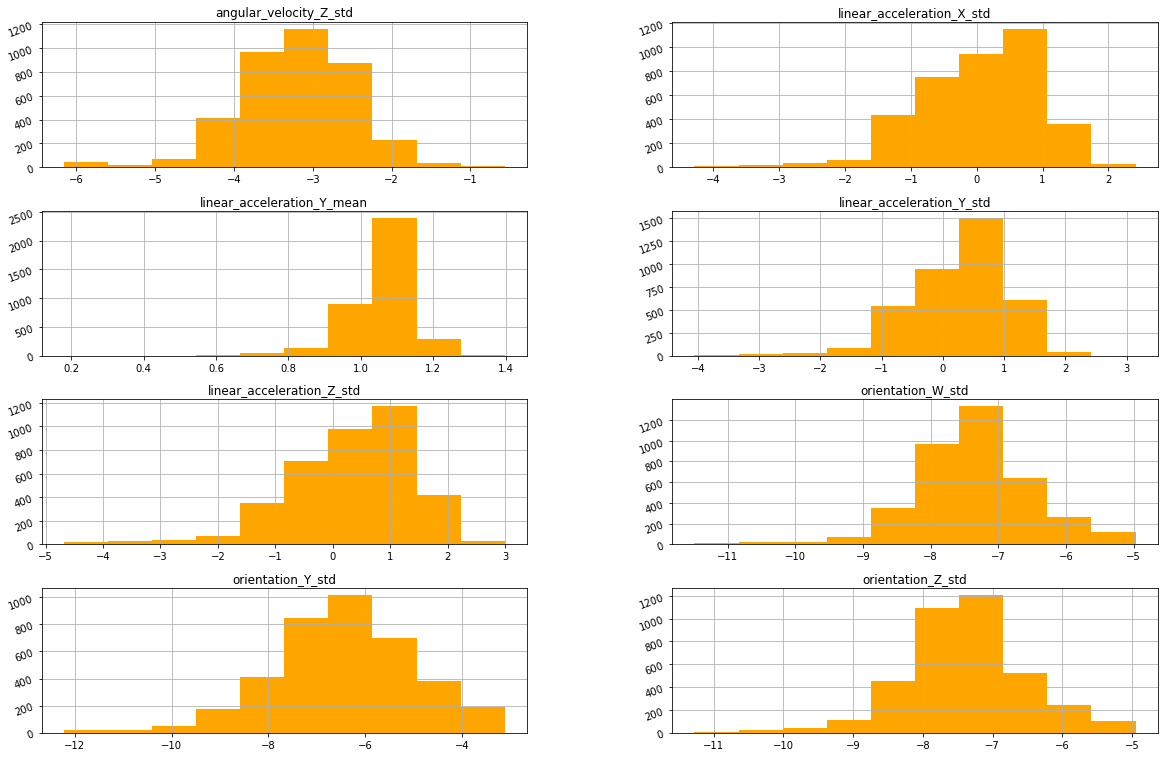

In [102]:
rcParams['figure.figsize'] = 30, 12
x_new[pos_skewed].hist(figsize=(20,20),
                                                                                 yrot=20,
                                                                                 color="orange",
                                                                                 layout=(6,2));

In [103]:
pos_skewed

['linear_acceleration_Y_mean',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

In [104]:
neg_skewed1=['orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

In [105]:
neg_skewed

['linear_acceleration_Z_mean',
 'angular_velocity_X_Q',
 'linear_acceleration_Z_Q']

In [106]:
neg_skewed=neg_skewed+neg_skewed1

In [107]:
len(neg_skewed)

10

In [108]:
neg_skewed

['linear_acceleration_Z_mean',
 'angular_velocity_X_Q',
 'linear_acceleration_Z_Q',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

In [109]:
pos_skewed=["linear_acceleration_Y_mean"]

In [110]:
x_new1=x_new.copy()

In [111]:
x_new1[pos_skewed[0]]=np.sqrt(x_new[pos_skewed[0]])

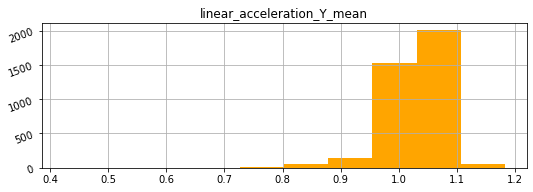

In [112]:
rcParams['figure.figsize'] = 30, 12
x_new1[pos_skewed].hist(figsize=(20,20),
                                                                                 yrot=20,
                                                                                 color="orange",
                                                                                 layout=(6,2));

In [113]:
x_new1[pos_skewed[0]].skew()

-2.5737562554254225

In [114]:
x_new1['linear_acceleration_Y_mean'].skew()

-2.5737562554254225

**Sqaure root transformation is not working**

## Box-Xox Transformation

In [115]:
from scipy.stats import boxcox

In [116]:
x_new2=x_new.copy()

In [117]:
x_new2[pos_skewed[0]],lmbda=boxcox(x_new2[pos_skewed[0]],lmbda=None)

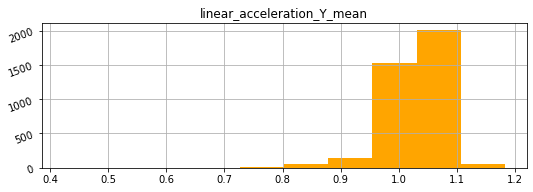

In [118]:
rcParams['figure.figsize'] = 30, 12
x_new1[pos_skewed].hist(figsize=(20,20),
                                                                                 yrot=20,
                                                                                 color="orange",
                                                                                 layout=(6,2));

In [119]:
x_new2[pos_skewed[0]].skew()

0.1943287546415986

In [120]:
x_new[pos_skewed[0]],lmbda=boxcox(x_new[pos_skewed[0]],lmbda=None)

**Now the the Skewness of the positive columns have reduced efficiently.**

Only Column left with skewness are

In [121]:
neg_skewed

['linear_acceleration_Z_mean',
 'angular_velocity_X_Q',
 'linear_acceleration_Z_Q',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

But these columns have negative values in them.

# Training and Testing The Models With the new Data.

In [122]:
x_new

,linear_acceleration_X_mean,linear_acceleration_Y_mean,linear_acceleration_Z_mean,orientation_Z_Q,orientation_W_Q,angular_velocity_X_Q,linear_acceleration_X_Q,linear_acceleration_Y_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,,,,,,,
0,0.263418,0.107199,-9.320391,-0.105500,-0.106555,-0.005082,0.231665,3.40755,-9.42995,-7.660332,-7.747548,-7.851247,-4.067072,-0.093020,0.327713,0.090791
1,0.121867,0.018696,-9.388899,0.031688,-0.146910,0.010344,0.003571,2.75010,-9.41380,-7.603363,-7.584539,-7.559422,-2.695139,0.100700,0.622970,0.752861
2,0.149711,0.065762,-9.395783,-0.129405,-0.071139,-0.003120,0.174515,3.03375,-9.37440,-7.149716,-7.522898,-8.187060,-3.822838,-0.279531,0.570862,0.131262
3,0.201791,-0.021712,-9.451164,0.038889,-0.142510,0.006709,0.317205,3.00885,-9.16170,-7.699529,-7.708088,-6.592138,-3.433767,0.386635,1.435420,1.246610
4,-0.086171,0.106020,-9.349988,0.060113,-0.136560,0.010157,-0.054043,3.13565,-9.33280,-5.088811,-6.922543,-7.521882,-3.257381,-0.826206,0.129075,-0.207534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,0.266687,0.009992,-9.465299,0.144740,-0.042384,-0.005029,0.390665,2.58605,-9.65750,-8.254667,-7.736414,-7.805151,-2.897600,0.692307,0.578692,1.485956
3806,0.136476,0.071381,-9.367247,0.129900,0.076329,-0.000334,0.136950,2.90145,-9.36740,-7.162372,-8.860549,-8.578029,-6.007573,-3.416297,-3.568349,-3.974333
3807,-0.061158,0.458546,-9.192466,0.139735,-0.070142,0.038776,0.165465,3.65475,-9.53715,-4.998255,-6.188698,-6.479620,-2.259520,1.194653,1.526009,1.703087


In [123]:
y_new

,surface
0,4
1,8
2,8
3,8
4,2
...,...
3805,5
3806,6
3807,4
3808,5


In [152]:
x_train,x_val,y_train,y_val=train_test_split(x_new,y_new,
                                            test_size=0.15)

In [153]:
  
    classifiers = [GaussianNB(), 
                   SVC(kernel = 'rbf', probability = True), 
                   DecisionTreeClassifier(splitter='random',max_depth=30,
                                          random_state = 62), 
                   RandomForestClassifier(n_estimators = 100,
                                          criterion='entropy',
                                          random_state = 92,
                                          class_weight='balanced',
                                          max_depth=30), 
               GradientBoostingClassifier(random_state = 92),
                  XGBClassifier(max_depth=30, objective='multi:softprob', n_estimators=100, 
                        num_classes=9,
                           verbosity=0)]
    classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier",
                    "XGBClassifier"]
    accuracies = []
    
    

In [154]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_val, y_pred,average='weighted')))
    accuracy = accuracy_score(y_val, y_pred)*100
    accuracies.append(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gaussian Naive Bayes:
F1 score: 0.40
Support Vector Classifier:
F1 score: 0.39
Decision Tree Classifier:
F1 score: 0.66


<ipython-input-154-9f6f5f1a07b9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


Random Forest Classifier:
F1 score: 0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gradient Boosting Classifier:
F1 score: 0.81


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier:
F1 score: 0.87


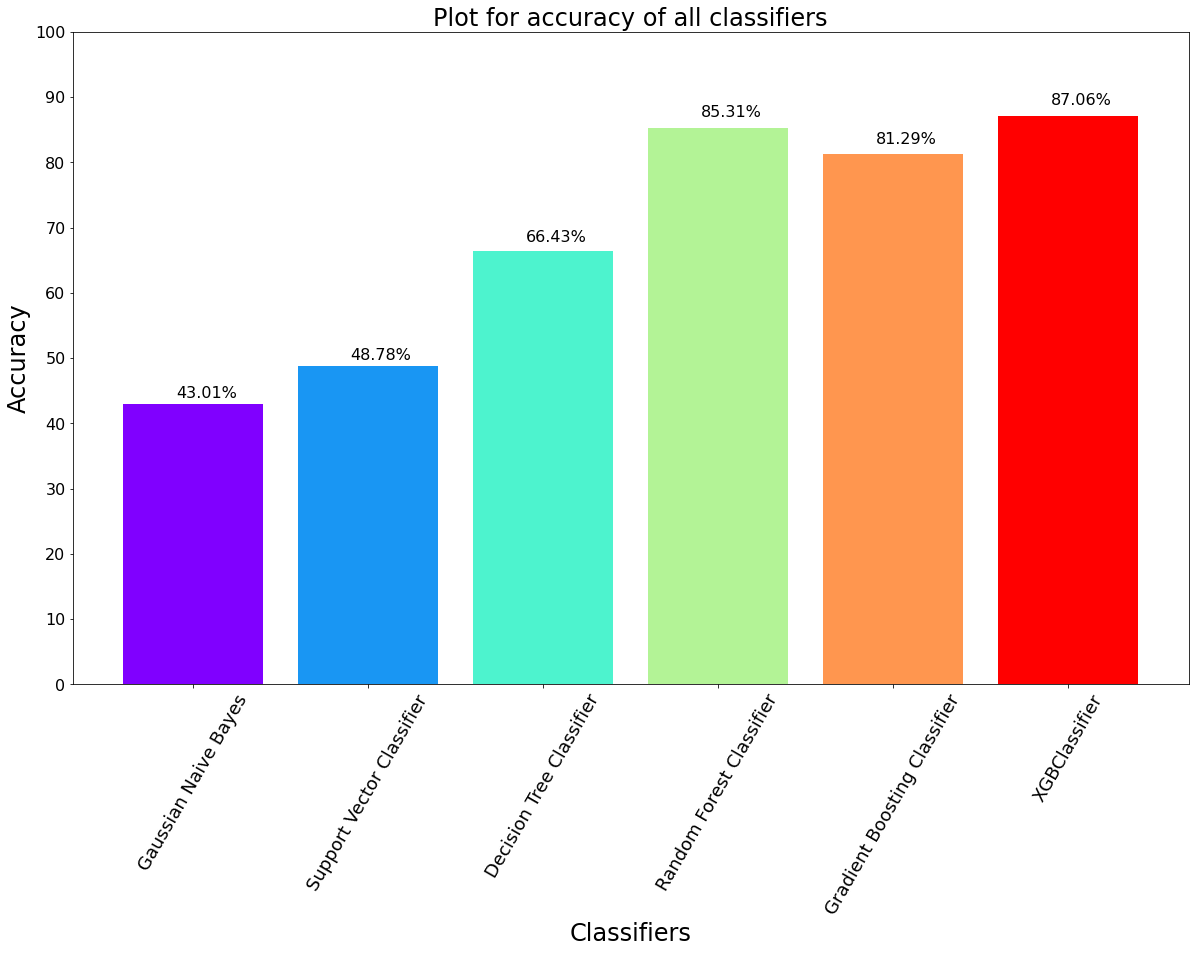

In [155]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 18,rotation=60)
plt.xlabel("Classifiers", fontsize = 24)

plt.ylabel("Accuracy", fontsize = 24)
plt.title("Plot for accuracy of all classifiers", fontsize = 24)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

**Best Score with this skewed Transformed Data is 87.06**

**Further Possibilities**:
    * Deal with negative skewed data and increase the score.
    * Don't drop the columns that we dropped in the begining on the basis of `Correlation Metrics`

# treating the Reamaning Skewed Data

In [178]:
x_ex=x_new.copy()
y_ex=y_new.copy()

In [179]:
neg_skewed

['linear_acceleration_Z_mean',
 'angular_velocity_X_Q',
 'linear_acceleration_Z_Q',
 'orientation_Y_std',
 'orientation_Z_std',
 'orientation_W_std',
 'angular_velocity_Z_std',
 'linear_acceleration_X_std',
 'linear_acceleration_Y_std',
 'linear_acceleration_Z_std']

In [180]:
x_ex[neg_skewed]

,linear_acceleration_Z_mean,angular_velocity_X_Q,linear_acceleration_Z_Q,orientation_Y_std,orientation_Z_std,orientation_W_std,angular_velocity_Z_std,linear_acceleration_X_std,linear_acceleration_Y_std,linear_acceleration_Z_std
series_id,,,,,,,,,,
0,-9.320391,-0.005082,-9.42995,-7.660332,-7.747548,-7.851247,-4.067072,-0.093020,0.327713,0.090791
1,-9.388899,0.010344,-9.41380,-7.603363,-7.584539,-7.559422,-2.695139,0.100700,0.622970,0.752861
2,-9.395783,-0.003120,-9.37440,-7.149716,-7.522898,-8.187060,-3.822838,-0.279531,0.570862,0.131262
3,-9.451164,0.006709,-9.16170,-7.699529,-7.708088,-6.592138,-3.433767,0.386635,1.435420,1.246610
4,-9.349988,0.010157,-9.33280,-5.088811,-6.922543,-7.521882,-3.257381,-0.826206,0.129075,-0.207534
...,...,...,...,...,...,...,...,...,...,...
3805,-9.465299,-0.005029,-9.65750,-8.254667,-7.736414,-7.805151,-2.897600,0.692307,0.578692,1.485956
3806,-9.367247,-0.000334,-9.36740,-7.162372,-8.860549,-8.578029,-6.007573,-3.416297,-3.568349,-3.974333
3807,-9.192466,0.038776,-9.53715,-4.998255,-6.188698,-6.479620,-2.259520,1.194653,1.526009,1.703087


## Exponential Transformations

In [181]:
x_ex[neg_skewed]=np.exp(x_ex[neg_skewed])

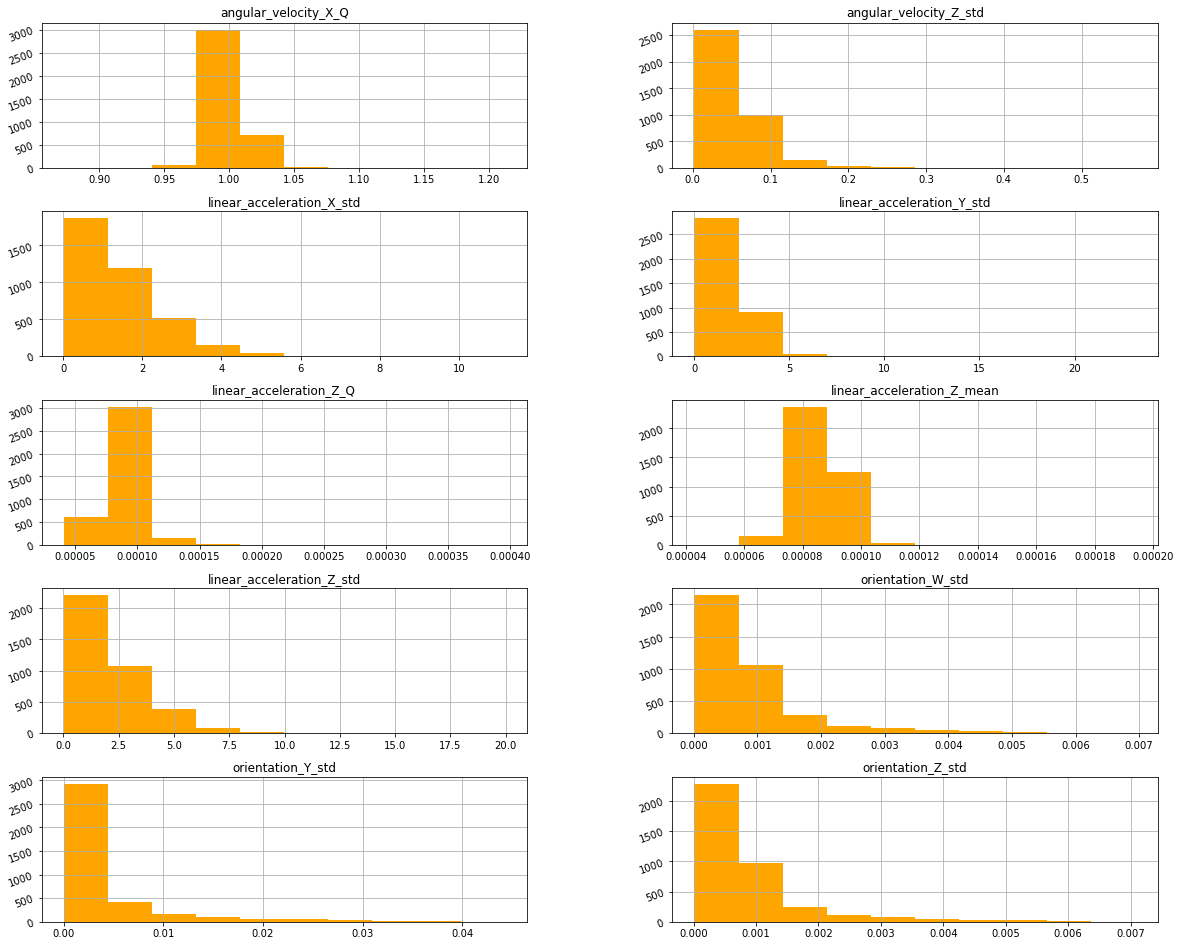

In [182]:
rcParams['figure.figsize'] = 30, 12
x_ex[neg_skewed].hist(figsize=(20,20),
                                                                                 yrot=20,
                                                                                 color="orange",
                                                                                 layout=(6,2));

In [183]:
for i in range(len(neg_skewed)):
    skewness_value=x_new[neg_skewed[i]].skew()
    print(f"The Skewness of {neg_skewed[i]} is :: {skewness_value}")

The Skewness of linear_acceleration_Z_mean is :: -0.5401443423760927
The Skewness of angular_velocity_X_Q is :: 0.58735596996692
The Skewness of linear_acceleration_Z_Q is :: 0.8474141964589363
The Skewness of orientation_Y_std is :: -0.3237159934827754
The Skewness of orientation_Z_std is :: -0.14099633662754177
The Skewness of orientation_W_std is :: -0.3465516811012201
The Skewness of angular_velocity_Z_std is :: -0.5075054349348073
The Skewness of linear_acceleration_X_std is :: -0.8425518669396459
The Skewness of linear_acceleration_Y_std is :: -1.0561882551707762
The Skewness of linear_acceleration_Z_std is :: -1.0028156744718943


## Square Root Transformation

In [184]:
x_ex[neg_skewed]=np.sqrt(x_ex[neg_skewed])

In [185]:
for i in range(len(neg_skewed)):
    skewness_value=x_ex[neg_skewed[i]].skew()
    print(f"The Skewness of {neg_skewed[i]} is :: {skewness_value}")

The Skewness of linear_acceleration_Z_mean is :: 0.01291962565025089
The Skewness of angular_velocity_X_Q is :: 0.8407010772301343
The Skewness of linear_acceleration_Z_Q is :: 2.055158717547964
The Skewness of orientation_Y_std is :: 1.5543883308076238
The Skewness of orientation_Z_std is :: 1.4266262281599333
The Skewness of orientation_W_std is :: 1.3637187074833916
The Skewness of angular_velocity_Z_std is :: 1.2225853620766274
The Skewness of linear_acceleration_X_std is :: 0.532395501419138
The Skewness of linear_acceleration_Y_std is :: 0.5845349311279552
The Skewness of linear_acceleration_Z_std is :: 0.5055175637710411


## BoxCox Transformation

In [186]:
len(neg_skewed)

10

In [187]:
for i in range( len(neg_skewed)):
    x_ex[neg_skewed[i]],lmbda=boxcox(x_ex[neg_skewed[i]],lmbda=None)

In [188]:
for i in range(len(neg_skewed)):
    skewness_value=x_ex[neg_skewed[i]].skew()
    print(f"The Skewness of {neg_skewed[i]} is :: {skewness_value}")

The Skewness of linear_acceleration_Z_mean is :: 0.13902320232418083
The Skewness of angular_velocity_X_Q is :: -0.13987834912513258
The Skewness of linear_acceleration_Z_Q is :: -0.13177170584193518
The Skewness of orientation_Y_std is :: 0.004485628143134915
The Skewness of orientation_Z_std is :: 0.010210415640185553
The Skewness of orientation_W_std is :: 0.027536373440221525
The Skewness of angular_velocity_Z_std is :: 0.039263168760394214
The Skewness of linear_acceleration_X_std is :: -0.014362305270075825
The Skewness of linear_acceleration_Y_std is :: 0.035854422632122906
The Skewness of linear_acceleration_Z_std is :: -0.034057616632830384


**Now the skewness has been reduced Drastically**

# Training and Testin with this No Skewed Data

In [221]:
x_train,x_val,y_train,y_val=train_test_split(x_ex,y_ex,
                                            test_size=0.2)

In [222]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(splitter='random',max_depth=30,
                                      random_state=20),
               RandomForestClassifier(n_estimators = 1000,
                                      criterion='entropy',
                                      random_state = 42,
                                      class_weight='balanced',
                                      max_depth=30), 
               GradientBoostingClassifier(random_state = 0),
              XGBClassifier(max_depth=30, objective='multi:softprob', n_estimators=1000, 
                        num_classes=9,
                           verbosity=0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier",
                    "XGBClassifier"]
accuracies = []

In [223]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_val, y_pred,average='weighted')))
    accuracy = accuracy_score(y_val, y_pred)*100
    accuracies.append(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gaussian Naive Bayes:
F1 score: 0.41
Support Vector Classifier:
F1 score: 0.12
Decision Tree Classifier:
F1 score: 0.74


<ipython-input-223-9f6f5f1a07b9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


Random Forest Classifier:
F1 score: 0.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gradient Boosting Classifier:
F1 score: 0.80


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier:
F1 score: 0.86


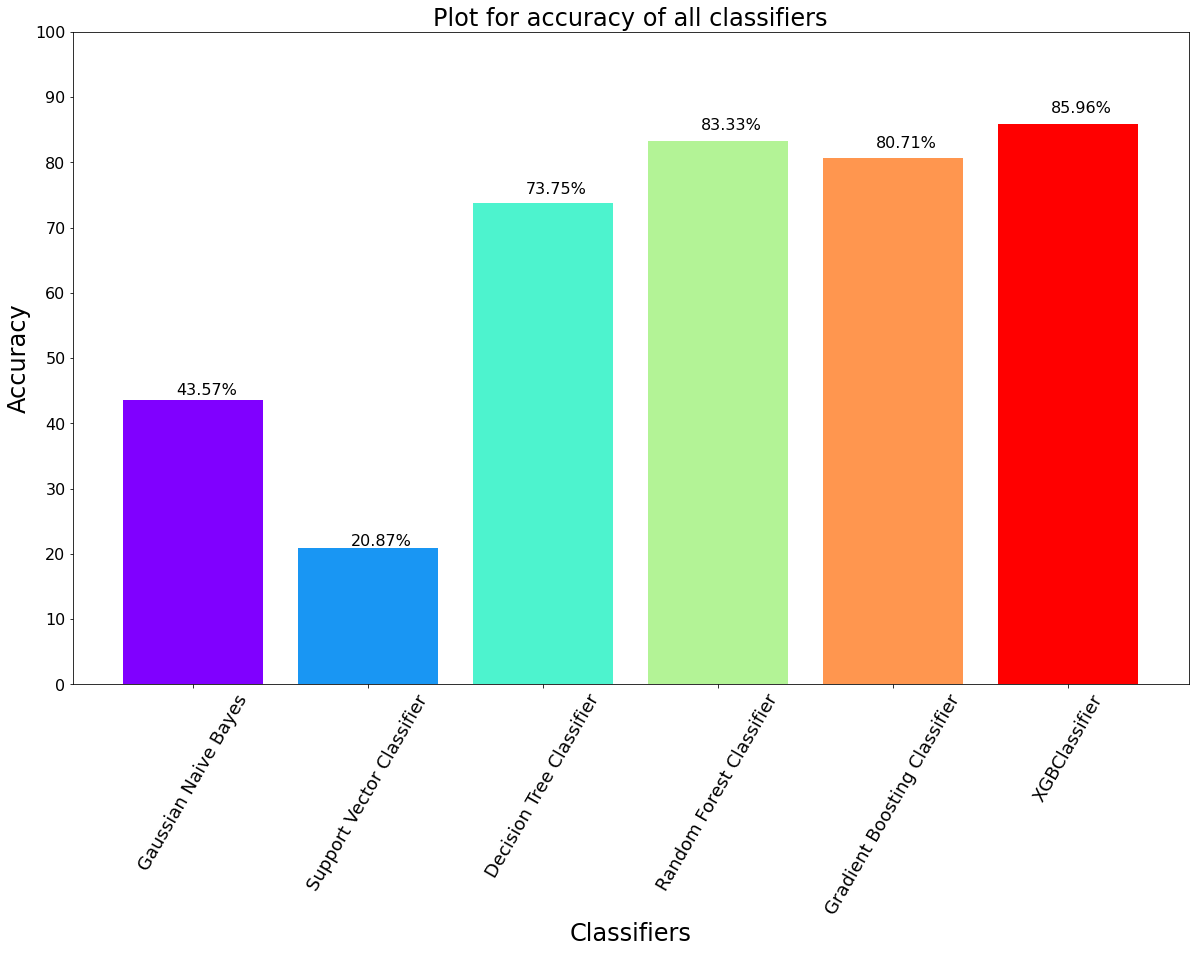

In [224]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 18,rotation=60)
plt.xlabel("Classifiers", fontsize = 24)

plt.ylabel("Accuracy", fontsize = 24)
plt.title("Plot for accuracy of all classifiers", fontsize = 24)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

**Accuracy has decreased Slightly** 

**Best Accuracy We have got is 87.06**

**Next Thing to increase Accuracy is Doing Hyper Parameter Tuning of the best two models i.e `RandomForestClassifier` and `XGBClassifier`**